# R Workshop 5

Welcome back to the R Workshop.  Last Spring we emphasized

* base R,
* the command line, and
* random variables.

You can go a long way with a strong grounding in these topics.
This Fall we're going to explore the **tidyverse**, a
confederation of utilities designed to work together to address
short comings of some legacy utilities.  Which one you ultimately
use is a choice you make depending on your comfort level and
the problem at hand.

The command line is great for interactive work and consumes
minimal processing resources.  However, an IDE like RStudio
is indispensible for

* converting interactive explorations into scripts that
  reproduce analysis;
* document analysis transparently for peer review,
  i.e. RMarkdown;
* exposing analysis interactively through JavaScript
  i.e. Shiny applications.

So we'll be mixing RStudio sessions into our workshops.

Finally, we'll apply our knowledge of random variables to study
the distribution of error likelihoods that form the basis
of point estimates and confidence intervals.  This will help
us select the appropriate R function for inferential analysis
and understand the results.  It will also serve as the foundation
for assessing the validity of statistical models that we plan
to study in the Spring.

The random variables section will be moved to a LaTeX document
for the following reasons.

1. While Jupyter notebook does a good job or rendering
   an equation here and there, it's not optimal for rendering
   more extended derivations.  LaTeX is better for that.
2. It will be easier to refer to previous workshop material
   if it's all in the same document.
3. Some of you may eventually be writing LaTeX documents
   yourselves to formalize your own analysis for publication.
   The LaTeX source may be helpful as a reference or a
   template.

Henceforth the math content will be referenced from these
workshop documents.

# The Tidyverse

The **tidyverse** packages can be installed with the following
R commands.

```
install.packages('tidyverse')
install.packages('nycflights13')
```

The first command will install the `tidyverse` package along with
its dependencies.  The **nycflights13** package provides datasets
on which to practice.
These have all been installed on the lab machines.

This Fall's workshops will appeal directly to sections from the
book [R for Data Science](http://r4ds.had.co.nz/).  Rather than
copying them here, I will simply reference the online sections that
we will cover.  We don't work through the book linearly because the
book assumes no previous knowledge of R.

Recall last Spring that we often worked with vectors and data frames
in R.  We covered various techniques to create them, manipulate them,
and process them.  The tidyverse notion of a data frame is a **tibble**.
It's a contraction of the words tidy-table.  (We'll address more
formally the notion of a
[tidy dataset](http://r4ds.had.co.nz/tidy-data.html) soon.)

## The `filter` Function

At this point in the workshop, let's jump to the first two sections
of Chapter 5 to learn about the **tibble** and **filter** function
from the **dplyr** package.

### Lab

<http://r4ds.had.co.nz/transform.html#introduction-2>

Work through Sections `5.1` and `5.2.1` through `5.2.3` to cover
the following topics.

* a summary of `dplyr` functions
* default output of a tibble
* the `filter` function
* comparing floating point numbers with `near`
* logical operators within the `filter` function
* missing values, `is.na()`

### Notes

* The **dplyr** package has been around for a while.
  It's in common use; but I avoided it in the workshop
  last Spring in order to focus on base R.  We'll
  embrace **dplyr** function this Fall.

* The section on conditionals emphasized the usage of
  `|` and `&` for the "`or`" and "`and`" conditionals
  respectively.  These are the so-called *vectorized*
  conditionals.  Do **not** use these in R **if**
  statements.  For **if** statements, use the
  *short-circuit* conditionals designated by
  `||` and `&&`.  An R **if** predicate will only
  evaluate the first element of a boolean vector.  A
  warning will result from a vectorized predicate.

### Try It

Take a few minutes to work through or ponder the
exercises in Section `5.2.4`.  The exercises will
be the starting point for this thread in the next
workshop to serve as a review before we move on
to the next **dplyr** function.

# Counting Processes

In the criminal justice community, much of the data we encounter
are rendered as counts of occurrences over a fixed time period.
Examples might include crimes reported in a certain zip code over
the period of a week, a month, or a single day.  Modeling such a process
has been the subject of much study.  It generally involves a counting
function $N(t)$ for $t \ge 0$ such that

* $N(0) = 0$,
* $N(t) \in \{0, 1, 2, \ldots\}$ for $t > 0$,
* $N$ never decreases.

When we speak of *modeling* such a process, we usually speak of
calculating quanities such as $P[N(t) = C]$ for some time $t$
and count $C$.  The most popular model for
a counting process is the *Poisson Process*.
There are four qualities of a Poisson process.

1. **Non-overlapping intervals are independent**.
   This means that an occurrence of an event in one interval
   does not impact the probability of the occurrence in a
   another non-overlapping interval.

2. **Poisson processes are stationary**.
   A *stationary process* is one in which the probability of
   the counts depend only on the size of the interval, not
   on where the interval lies.  More formally, it means
   that $P[N(t+h)-N(t) = C]$ is independent of $t$.
   (It depends only on $h$ and $C$.)

3. **First Count:** $P[N(t)=1] = \lambda t + o(t)$.

4. **More Counts:** $P[N(t) > 1] = o(t)$.

The $o(t)$ that appears in `3` and `4` is pronounced
"oh-of-tee".  It represents any function that satisfies
$o(0) = o'(0) = 0$.  If we consider a Taylor series
expansion of $o(t)$, the first two terms are zero.
So it looks like $o(t) = a_2 t^2 + a_3 t^3 + \dots$.
The visual way to think of a representative of $o(t)$
is that it's horizontal at the point $t=0$.

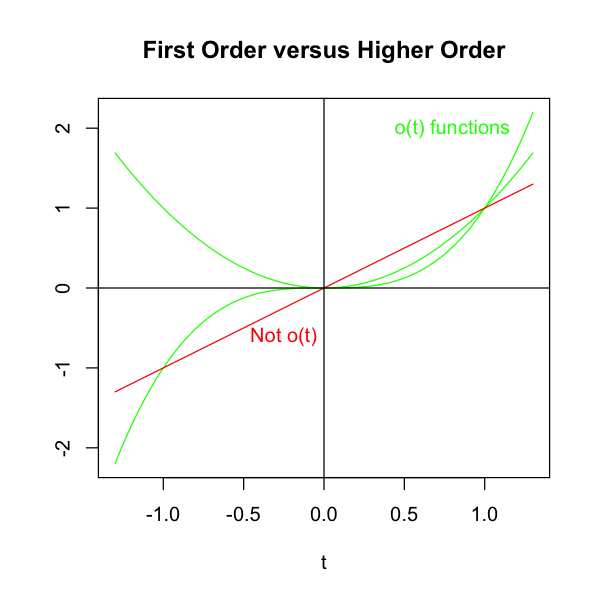

In [6]:
options(repr.plot.width=5, repr.plot.height=5)
t <- seq(-1.3, 1.3, length.out=101)
plot(t, t^3, type='l', col='green', 
     main="First Order versus Higher Order", xlab='t', ylab='')
lines(t, t^2, type='l', col='green')
lines(t, t, type='l', col='red')
abline(h=0, col='black')
abline(v=0, col='black')
text(0.8, 2, "o(t) functions", col='green')
text(-0.25, -0.6, "Not o(t)", col='red')

It can be shown that a Poisson counting process has the following
probability mass function for the number of counts that will occur
within the time period.

$$
f(i) = e^{-\lambda} \frac{\lambda^i}{i!}, \quad i \in 0, 1, 2, \dots
$$

**Exercises**

1. Find the moment generating function for the Poisson random variable.
2. Determine the expected value of the Poisson random variable.
3. Determine the variance of the Poisson random variable.
4. Work through the  **Poisson Distribution** section of the
   [Distributions Workshop](https://github.com/lacounty-isab/workshops/tree/master/distributions/r).

# Grammar of Graphics

Last Spring we experimented with various aspects of the **plot**
command along with its related functions.  You saw them again
in the preceding section on the Poisson distribution.  In this
section we introduce an alternative plotting system for R called
**ggplot2**.  The "gg" stands for *grammer of graphics* which
is an abstraction applied to plotting figures from data.

The abstraction is not something absent from how we ourselves
plot with regular base plot.  It simply provides explicit support
for concepts like

* splitting elements into layers,
* applying data values to colors and shapes, and
* separating global graphical properties from data-driven properties.

**ggplot2** takes a little getting used to.  But once you
get the hang of it, it's hard to go back to base.
So let's dig into
[Sections 3.1 and 3.2 of R for Data Science](http://r4ds.had.co.nz/data-visualisation.html)
and discuss the **Exercises** in `3.2.4`.